<a href="https://colab.research.google.com/github/Redcoder815/Machine_Learning/blob/main/NonLinearSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

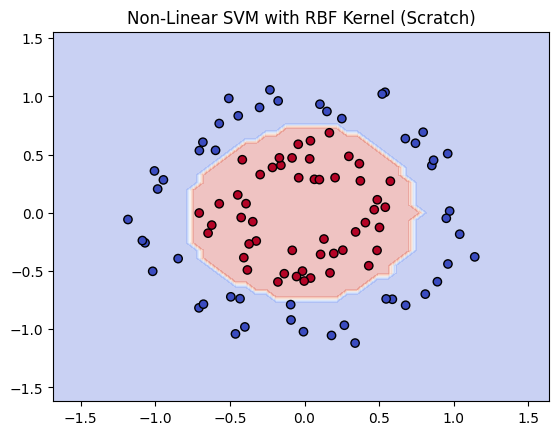

In [4]:
import numpy as np
import matplotlib.pyplot as plt

class NonLinearSVM:
    def __init__(self, kernel='rbf', gamma=0.1, C=1.0, lr=0.001, iterations=1000):
        self.kernel_type = kernel
        self.gamma = gamma
        self.C = C
        self.lr = lr
        self.iterations = iterations
        self.weight = None
        self.b = 0

    def _kernel(self, X1, X2):
        if self.kernel_type == 'rbf':
            # RBF Kernel implementation
            sq_dist = np.sum(X1**2, 1).reshape(-1, 1) + np.sum(X2**2, 1) - 2 * np.dot(X1, X2.T)
            return np.exp(-self.gamma * sq_dist)
        return np.dot(X1, X2.T) # Default Linear

    def fit(self, X, y):
        n_samples = X.shape[0]
        self.X_train = X
        self.y_train = y
        self.weight = np.zeros(n_samples)

        K = self._kernel(X, X) # Precompute Kernel Matrix

        # Simple Gradient Descent for Dual Problem (Hinge Loss)
        for _ in range(self.iterations):
            for i in range(n_samples):
                # Calculate margin: y_i * (sum(weight_j * y_j * K_ij) + b)
                margin = y[i] * (np.sum(self.weight * y * K[:, i]) + self.b)
                if margin < 1:
                    self.weight[i] += self.lr * (1 - margin)

    def predict(self, X):
        K = self._kernel(self.X_train, X)
        prediction = np.dot(self.weight * self.y_train, K) + self.b
        return np.sign(prediction)

# 4. Graph Code & Visualization
from sklearn.datasets import make_circles

# Generate non-linear data
X, y = make_circles(n_samples=100, factor=0.5, noise=0.1)
y = np.where(y == 0, -1, 1) # Map to [-1, 1]

# Train Model
model = NonLinearSVM(kernel='rbf', gamma=1.0)
model.fit(X, y)

# Plotting Decision Boundary
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
plt.title("Non-Linear SVM with RBF Kernel (Scratch)")
plt.show()
